## **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, precision_recall_curve, auc,
                             classification_report)
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

## **LOAD DATA**

In [ ]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## **DATA INFORMATION**

In [ ]:
#informasi data
print("INFORMASI DATA")
print(data.info())
print("--"*40)

print("DESKRIPSI DATA")
print(data.describe())
print("--"*40)

print("NULL CHECKING")
print(data.isna().sum())
print("--"*40)

print("DUPLICATE CHECK")
print(data.duplicated().sum())

INFORMASI DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


- Berdasarkan data information didapatkan bahwa data tidak memiliki null value
- Dan dari data ini memiliki 1081 data yang duplikat

## **HANDLE DUPLICATE**

In [ ]:
data = data.drop_duplicates()
print("DUPLICATE CHECK")
print(data.duplicated().sum())

DUPLICATE CHECK
0


## **EDA & DATA-PREPROCESSING**

In [ ]:
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

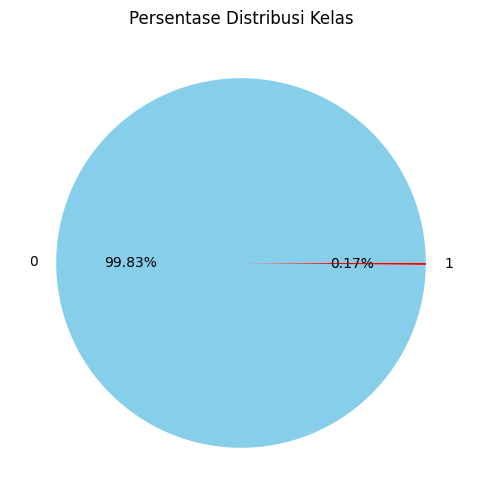

In [ ]:
# 1. Visualisasi Distribusi Kelas (Penipuan vs. Bukan Penipuan)
plt.figure(figsize=(6, 6))
data['Class'].value_counts().plot.pie(autopct='%1.2f%%', colors=['skyblue', 'red'])
plt.title("Persentase Distribusi Kelas")
plt.ylabel("")  # Hilangkan label sumbu Y
plt.show()

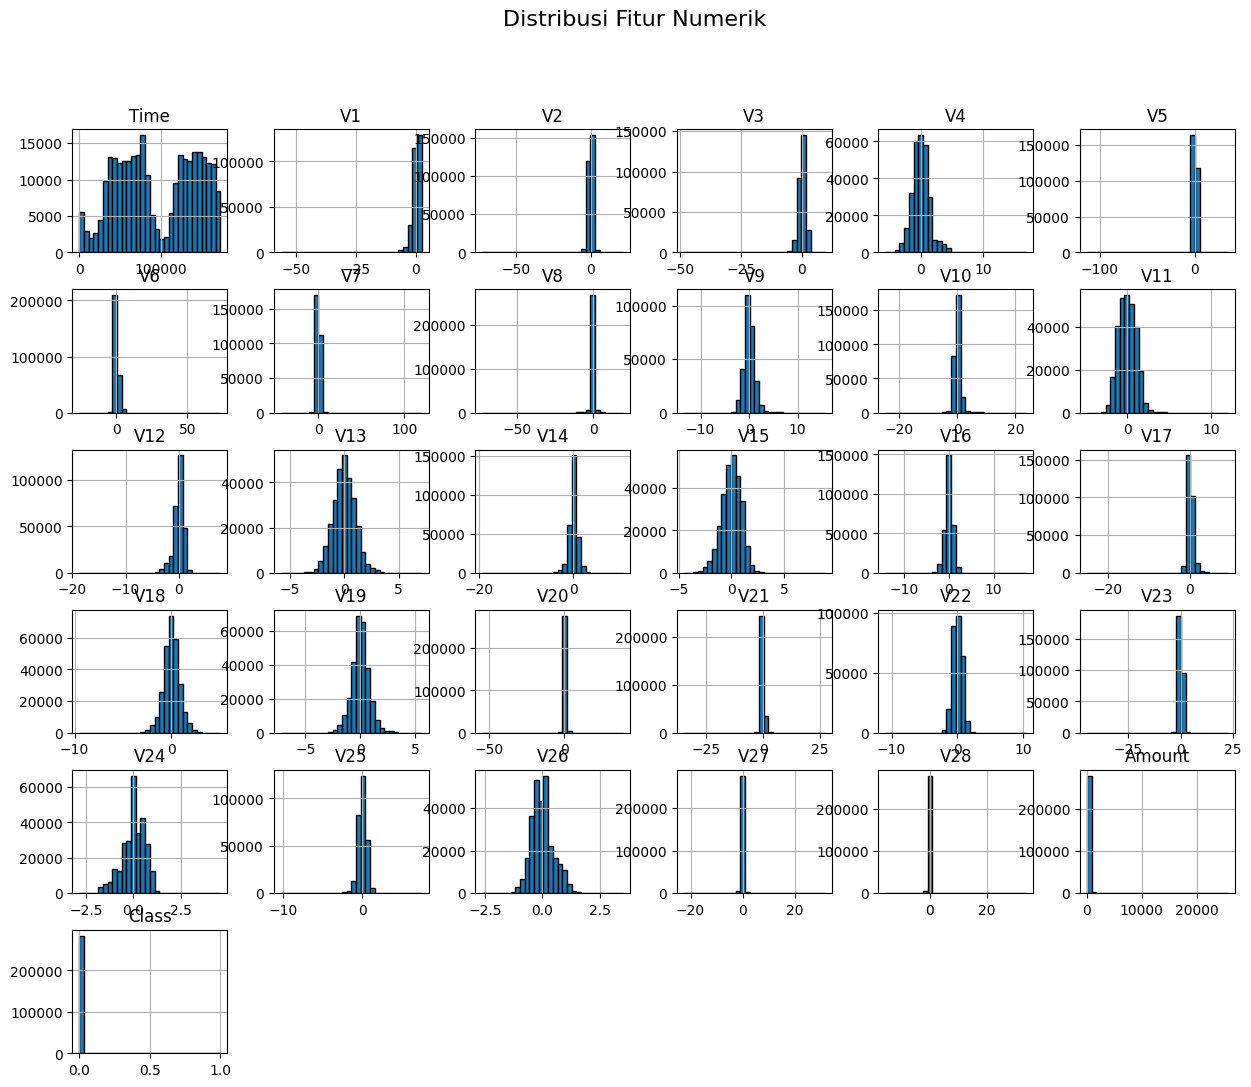

In [ ]:
# 2. Visualisasi Distribusi Fitur Numerik
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

data[num_cols].hist(figsize=(15, 12), bins=30, layout=(6, 6), edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.show()

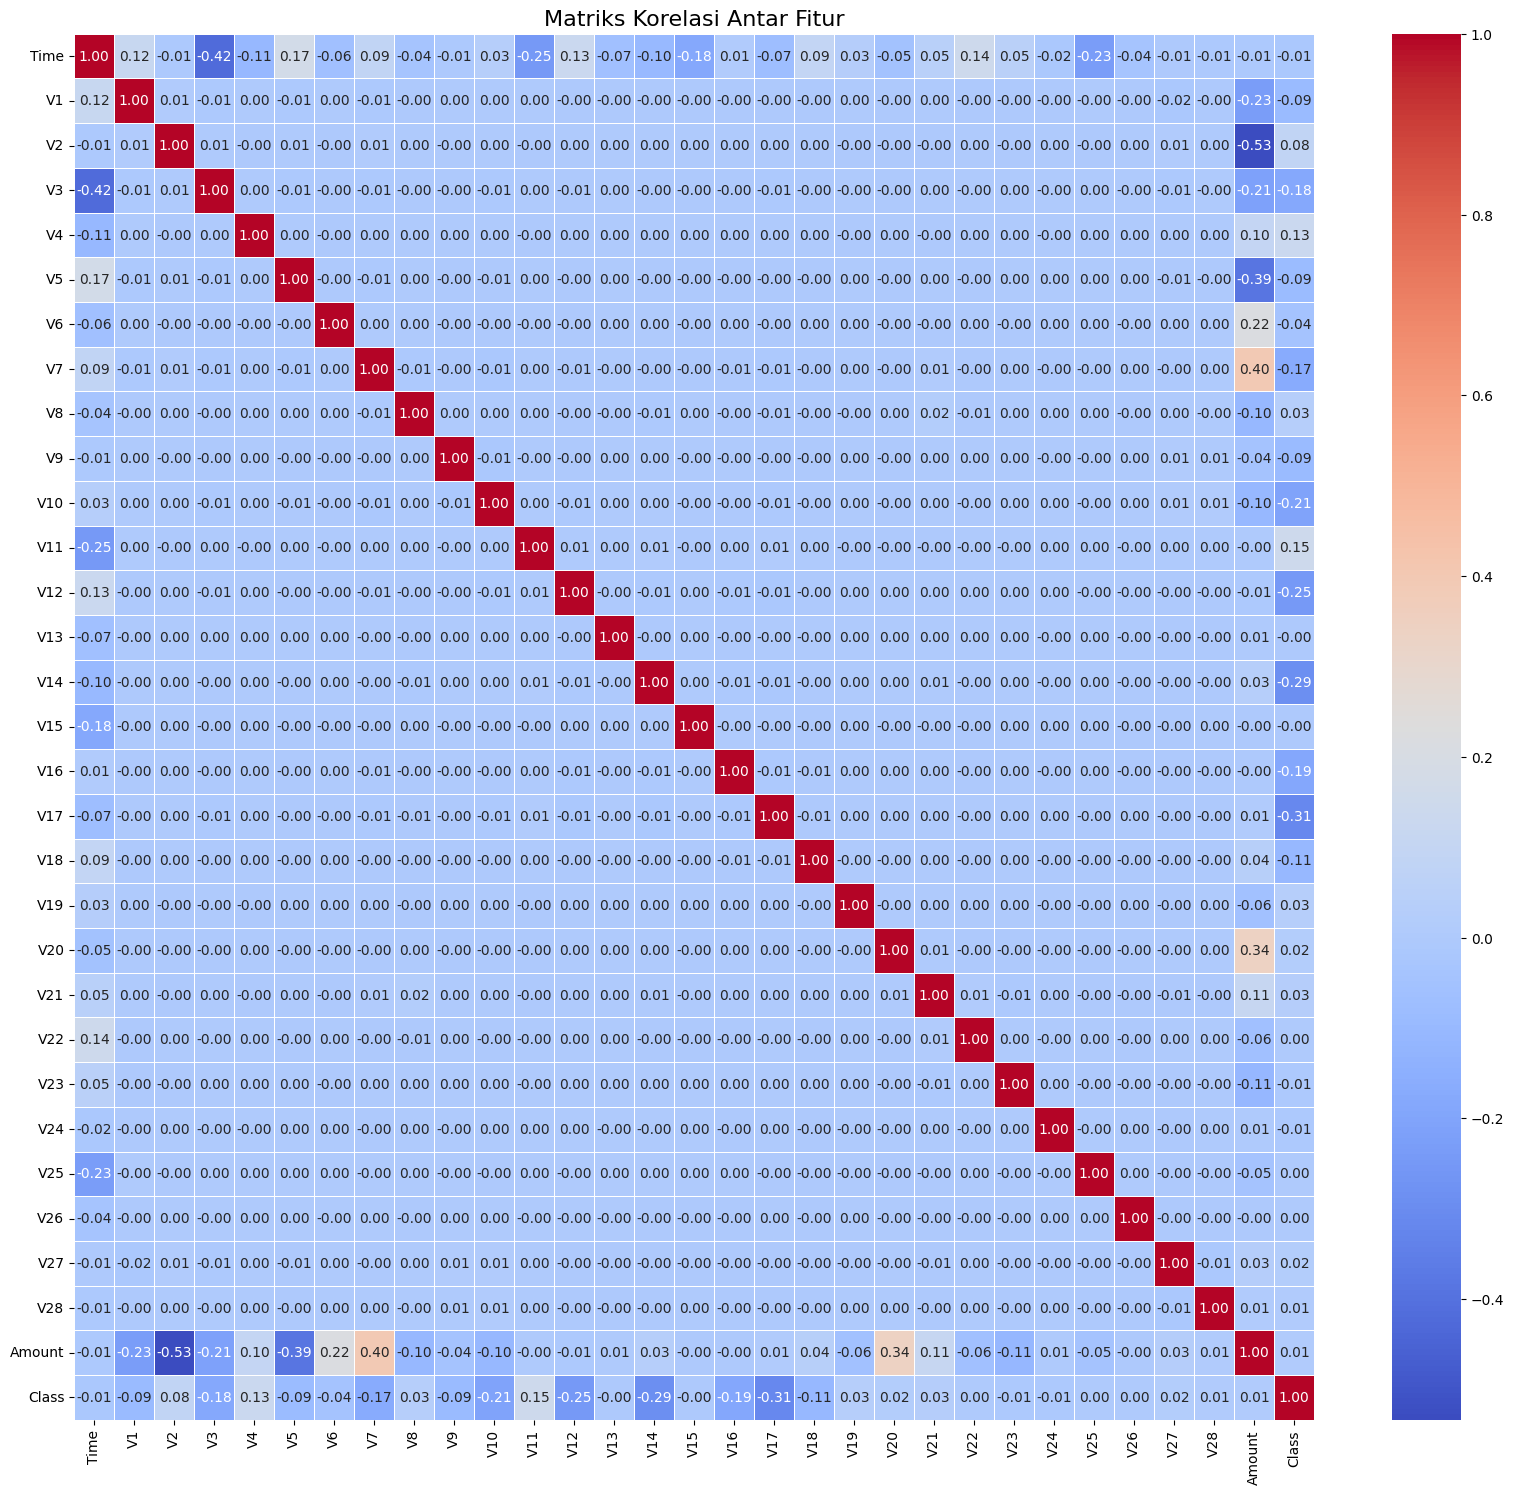

In [ ]:
# 3. Korelasi Antar Fitur
plt.figure(figsize=(20, 18))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriks Korelasi Antar Fitur", fontsize=16)
plt.show()

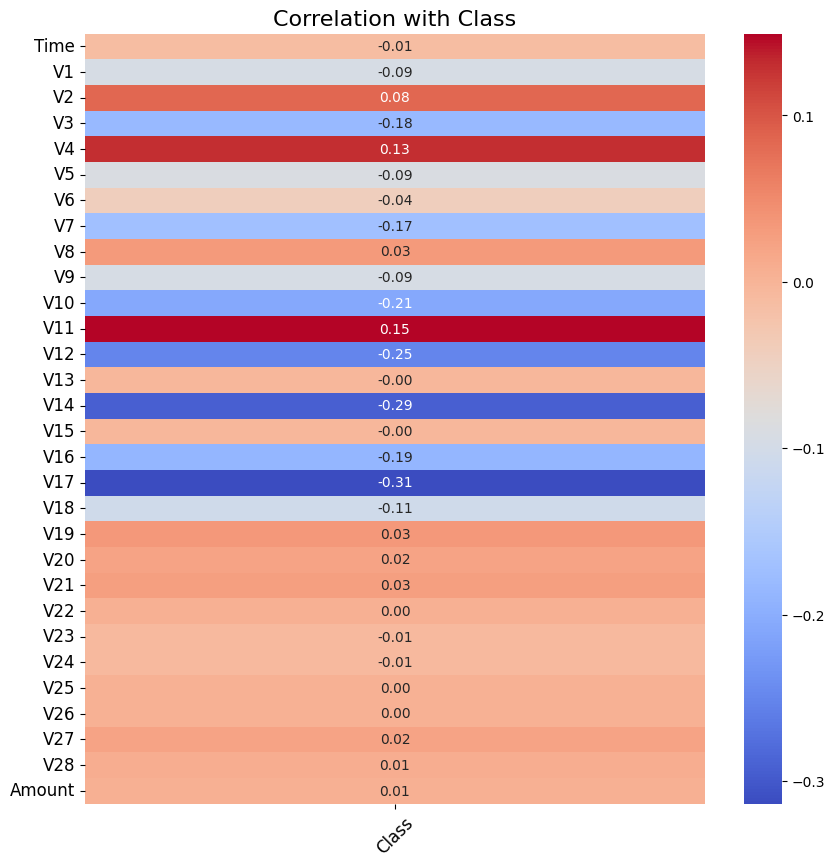

In [ ]:
# Pilih fitur dan target
features = data.drop(columns=['Class'])  # Kolom fitur
target = 'Class'  # Kolom target

# Hitung korelasi antara fitur dan target
correlation_with_target = data.corr()[target].drop(target)

# Plot heatmap korelasi
plt.figure(figsize=(10,10))
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation with Class', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
data['Time'].dtypes

dtype('float64')

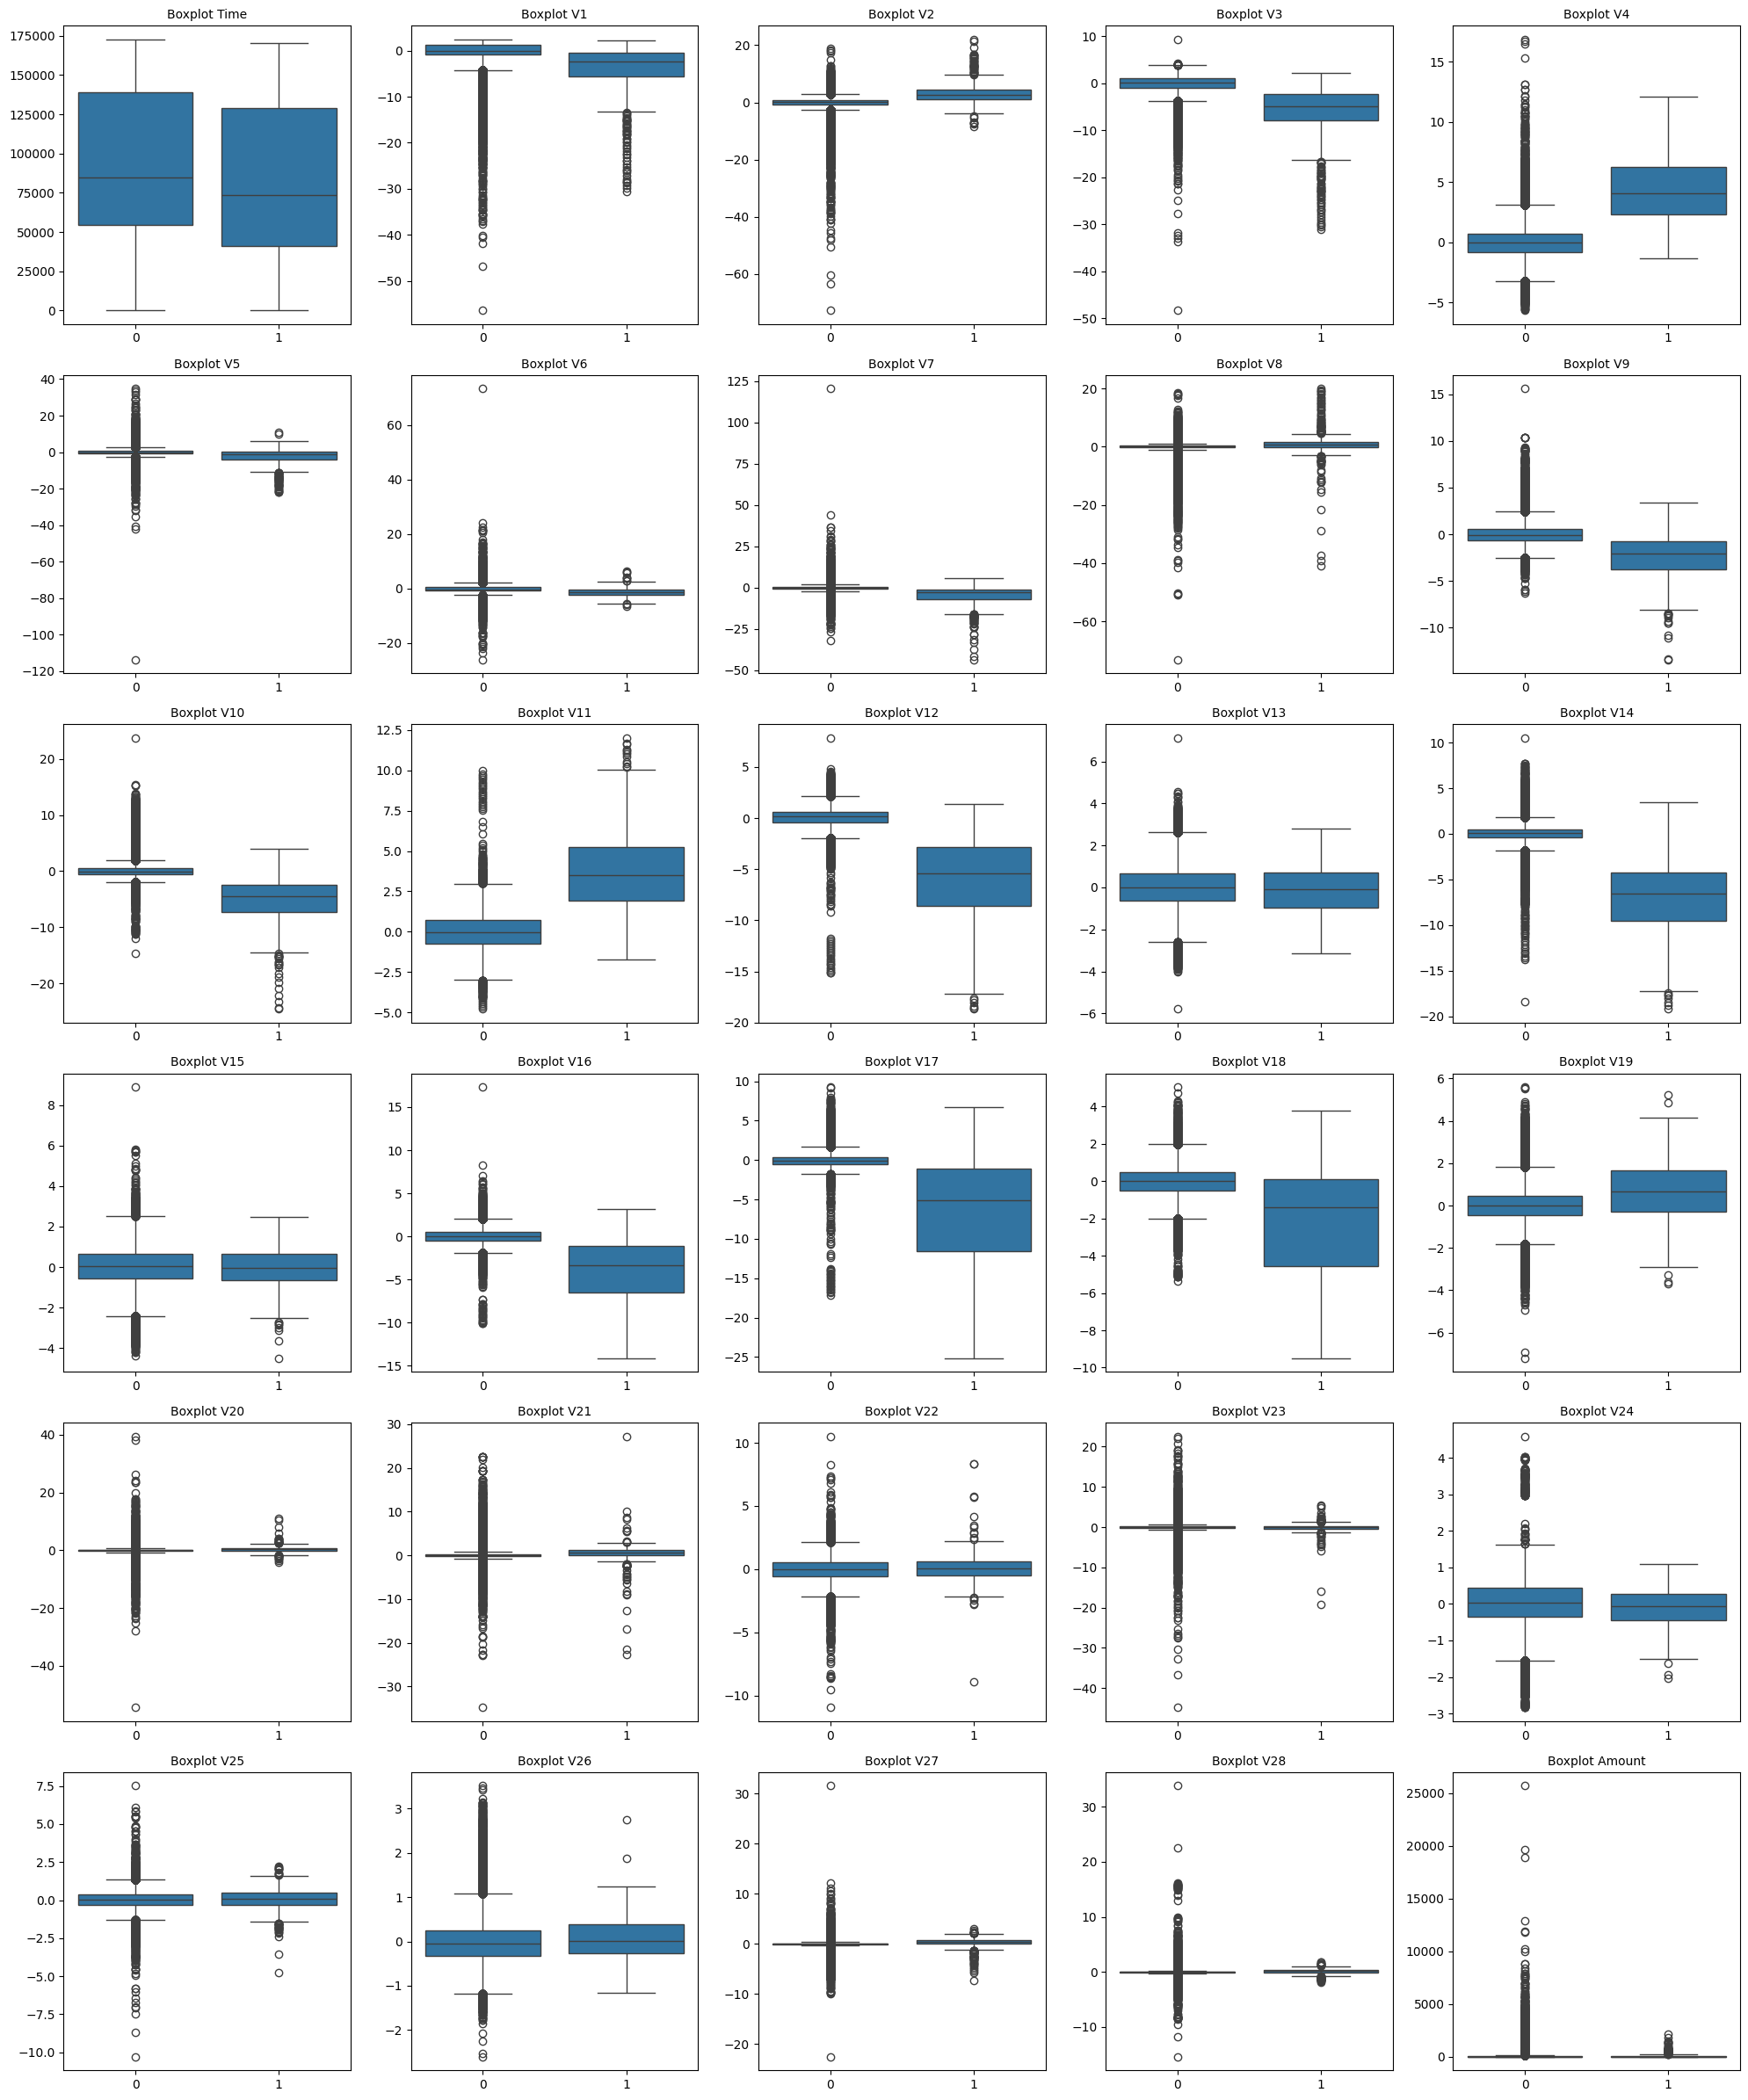

In [ ]:
# Ambil semua kolom kecuali 'Class' sebagai fitur
features = data.drop(columns=['Class']).columns

# Tentukan jumlah baris dan kolom untuk grid layout
num_cols = 5  # Maksimal 5 kolom per baris agar rapi
num_rows = (len(features) + num_cols - 1) // num_cols  # Hitung jumlah baris

# Buat figure dengan ukuran lebih besar
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows), sharey=False)

# Flatten axes agar mudah diakses dalam loop
axes = axes.flatten()

# Loop untuk membuat boxplot di setiap subplot
for i, col in enumerate(features):
    sns.boxplot(x=data['Class'], y=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot {col}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hilangkan subplot kosong jika jumlah fitur tidak habis dibagi num_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler
features2 = data.drop(columns=['Class'])

scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(features2), columns=features2.columns)
df_scaled['class'] = data['Class'].values

In [ ]:
df_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,-0.995290,-0.618360,-0.097622,1.229434,0.880878,-0.218773,0.632648,0.176974,0.143677,0.335739,...,0.026861,0.253199,-0.320939,0.032627,0.168017,-0.241512,0.816068,-0.246698,1.774718,0
1,-0.995290,0.524849,0.144367,-0.007034,0.295891,0.087159,0.165383,-0.106558,0.118241,-0.163546,...,-0.473668,-0.602596,0.363373,-0.479559,0.225835,0.314036,-0.064639,0.026214,-0.268530,0
2,-0.995279,-0.617709,-1.002505,0.831270,0.252882,-0.345402,1.780431,0.668400,0.422384,-1.178892,...,0.669336,0.714327,2.974843,-0.919547,-0.514733,-0.153300,-0.351138,-0.541896,4.959811,0
3,-0.995279,-0.442046,-0.177906,0.841592,-0.529031,0.033147,1.305834,0.175202,0.665139,-1.075980,...,-0.190254,-0.001308,-0.578965,-1.531860,0.944541,-0.299382,0.378404,0.382702,1.411487,0
4,-0.995267,-0.528050,0.581026,0.714142,0.267510,-0.271669,0.318307,0.491620,-0.547078,0.701771,...,0.048275,0.739164,-0.408139,0.126231,-0.332690,0.977848,1.346586,1.555108,0.667362,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,1.035258,-5.332169,7.145374,-5.225152,-1.285968,-4.078964,-2.000020,-4.415983,13.625815,1.586057,...,0.585997,0.098221,3.314371,-0.692986,2.126054,0.532968,5.821307,6.197405,-0.295230,0
283722,1.035270,-0.337440,-0.084985,0.967874,-0.450591,0.707883,1.143898,-0.014720,0.510672,0.513947,...,0.587809,0.856915,0.076334,-1.331217,-0.932275,-0.605059,0.413928,-0.494416,0.038798,0
283723,1.035282,0.850880,-0.260747,-1.789381,-0.336889,2.061355,2.836132,-0.300704,1.284337,0.391107,...,0.630848,0.533691,-0.085126,0.754375,0.373368,-0.062077,0.018389,-0.288712,0.638020,0
283724,1.035282,-0.116856,0.333095,0.272637,0.447890,-0.249218,0.771022,-0.647418,1.229575,0.358558,...,0.710945,0.740817,-0.491641,0.103488,-0.876203,1.056109,0.663224,0.711284,-0.166875,0


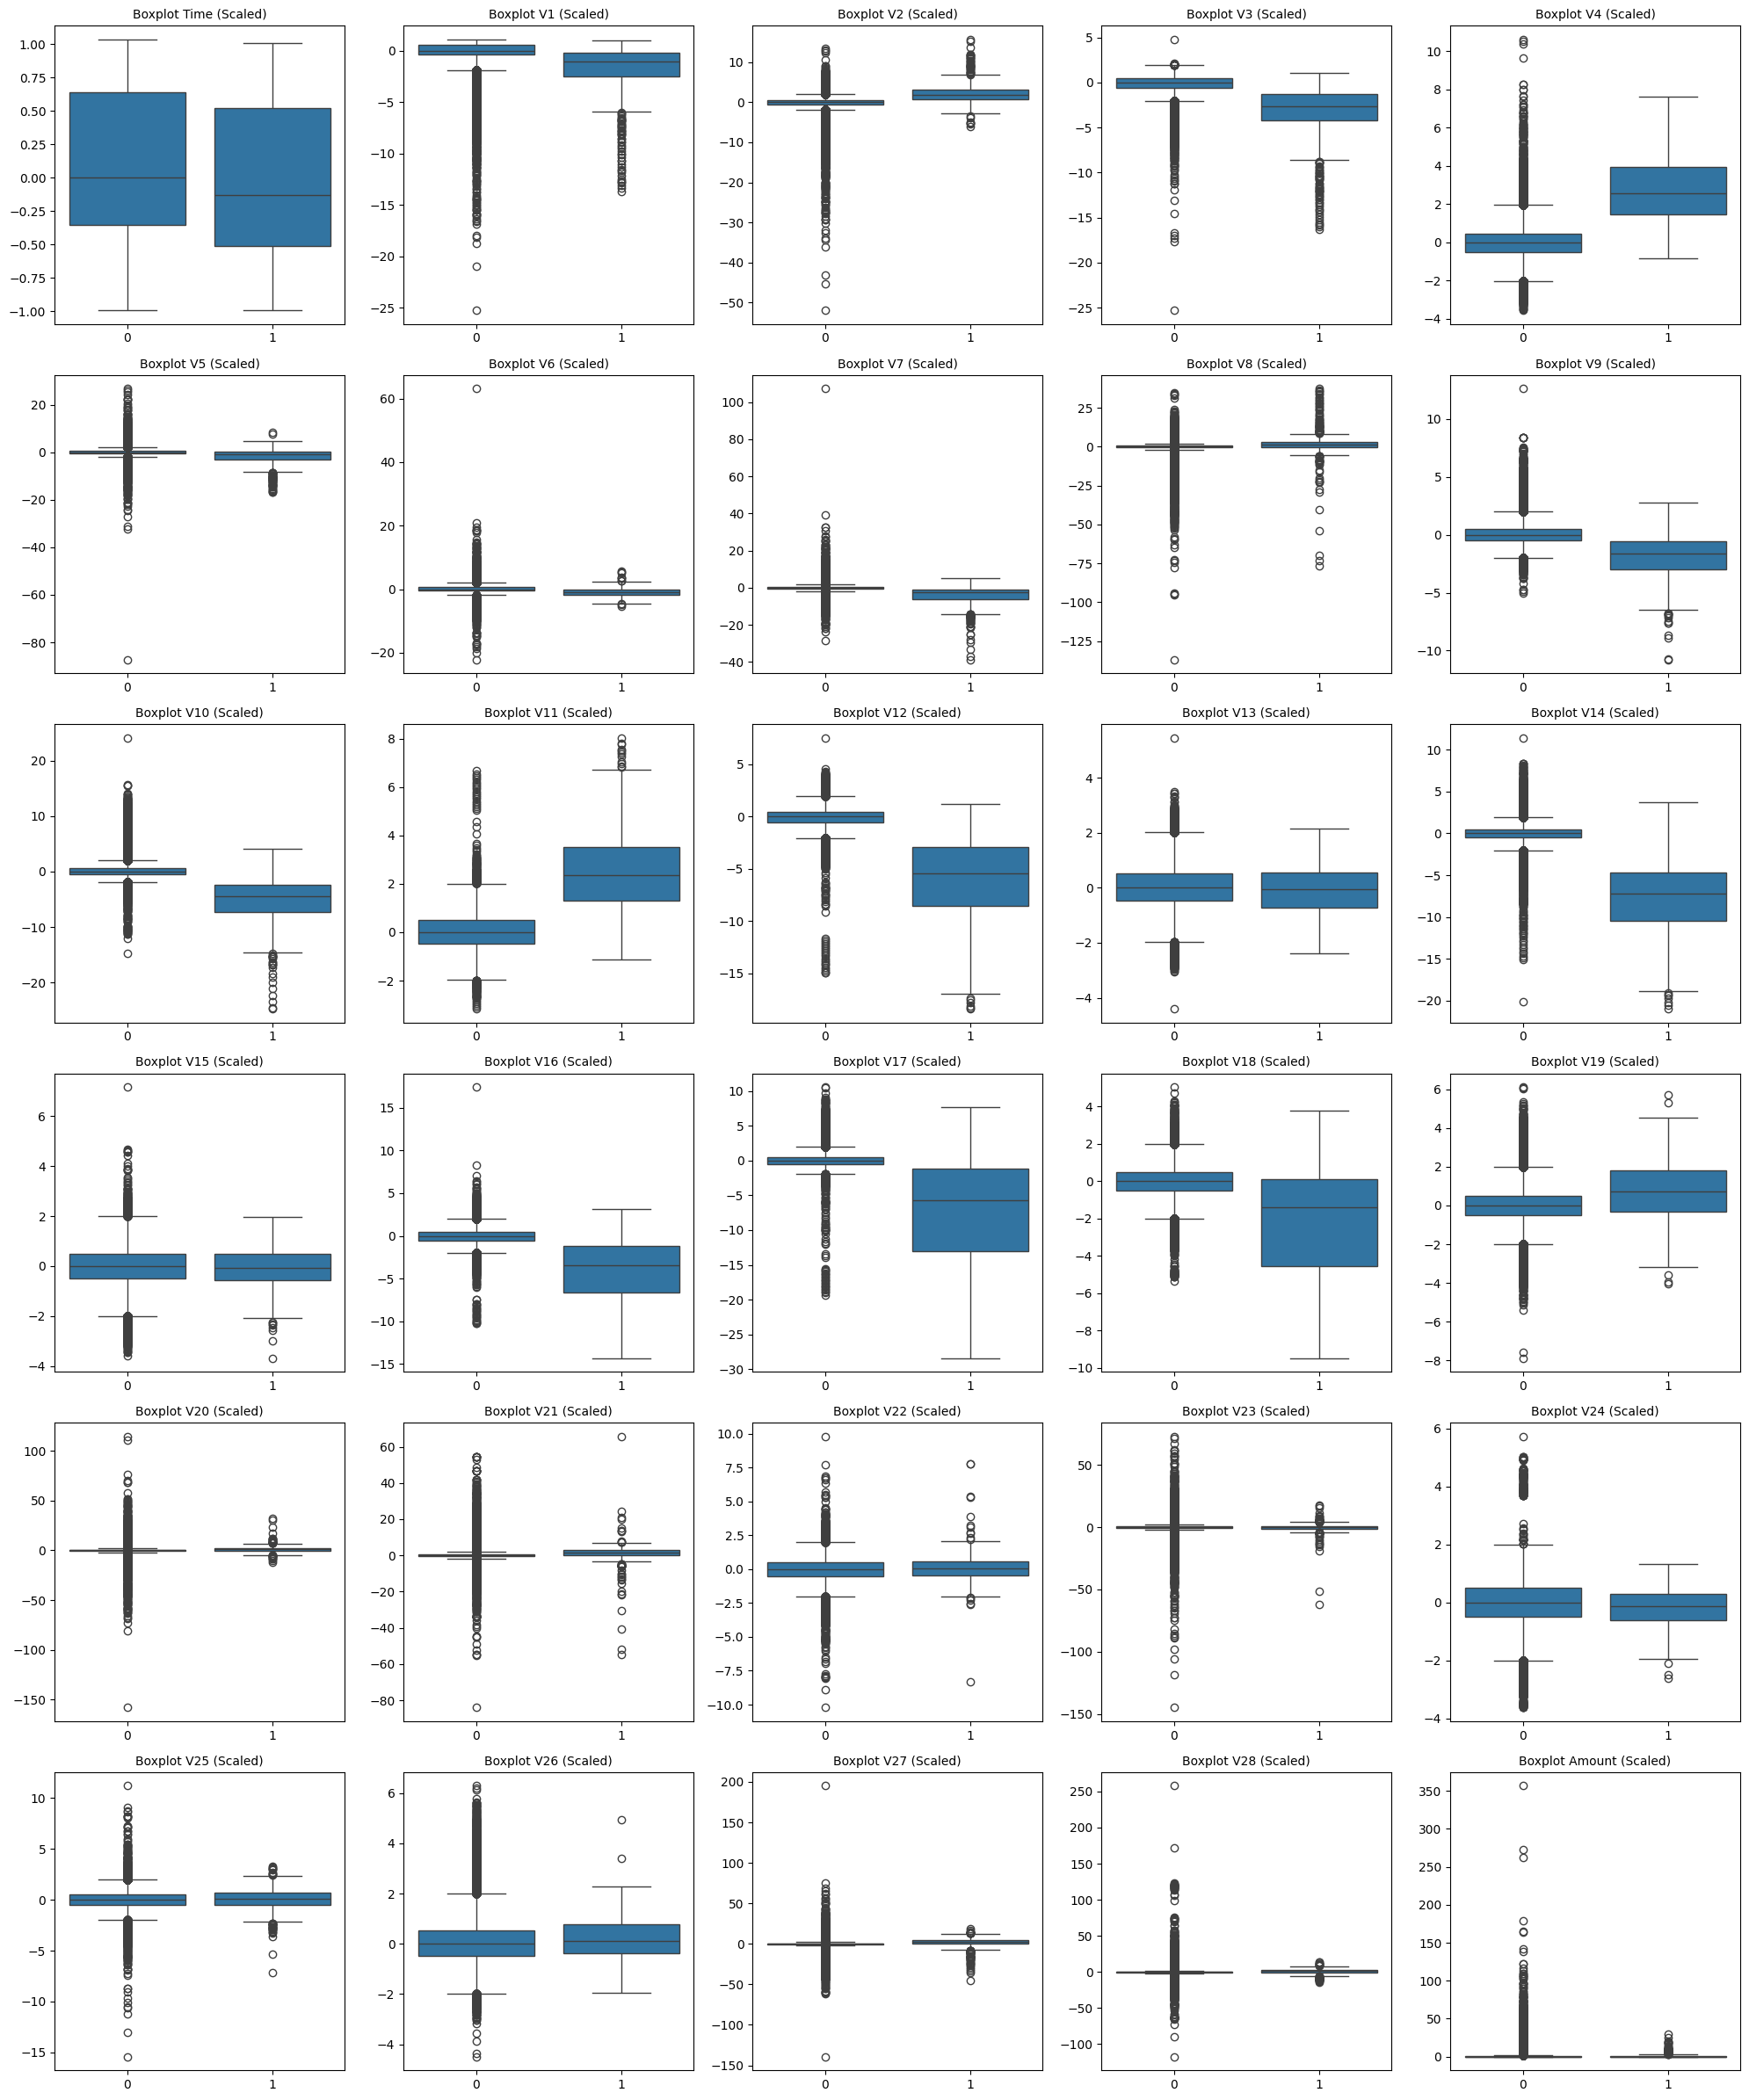

In [ ]:
# Ambil semua kolom kecuali 'class' sebagai fitur setelah scaling
features_scaled = df_scaled.drop(columns=['class']).columns

# Tentukan jumlah baris dan kolom untuk grid layout
num_cols = 5  # Maksimal 5 kolom per baris agar rapi
num_rows = (len(features_scaled) + num_cols - 1) // num_cols  # Hitung jumlah baris

# Buat figure dengan ukuran lebih besar
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows), sharey=False)

# Flatten axes agar mudah diakses dalam loop
axes = axes.flatten()

# Loop untuk membuat boxplot di setiap subplot
for i, col in enumerate(features_scaled):
    sns.boxplot(x=df_scaled['class'], y=df_scaled[col], ax=axes[i])
    axes[i].set_title(f'Boxplot {col} (Scaled)', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hilangkan subplot kosong jika jumlah fitur tidak habis dibagi num_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
#checking for outliers for each columns
numerical_cols = df_scaled.drop(columns=['class'])

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return outliers

# Deteksi outliers untuk setiap kolom numerik
for col in numerical_cols:
    outliers = detect_outliers_iqr(df_scaled, col)
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in Time: 0
Outliers in V1: 6948
Outliers in V2: 13390
Outliers in V3: 3306
Outliers in V4: 11094
Outliers in V5: 12221
Outliers in V6: 22886
Outliers in V7: 8839
Outliers in V8: 23904
Outliers in V9: 8199
Outliers in V10: 9345
Outliers in V11: 735
Outliers in V12: 15282
Outliers in V13: 3362
Outliers in V14: 14060
Outliers in V15: 2884
Outliers in V16: 8180
Outliers in V17: 7353
Outliers in V18: 7468
Outliers in V19: 10150
Outliers in V20: 27553
Outliers in V21: 14401
Outliers in V22: 1298
Outliers in V23: 18467
Outliers in V24: 4758
Outliers in V25: 5333
Outliers in V26: 5665
Outliers in V27: 38799
Outliers in V28: 30094
Outliers in Amount: 31685


## **SPLIT DATA**

In [ ]:
# Pastikan 'Class' adalah kolom target
X = df_scaled.drop(columns=['class'])
y = df_scaled['class']

# Split data tanpa Standar Scaler (karena sudah pakai MinMaxScaler sebelumnya)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **MODEL**


Evaluating XGBoost...


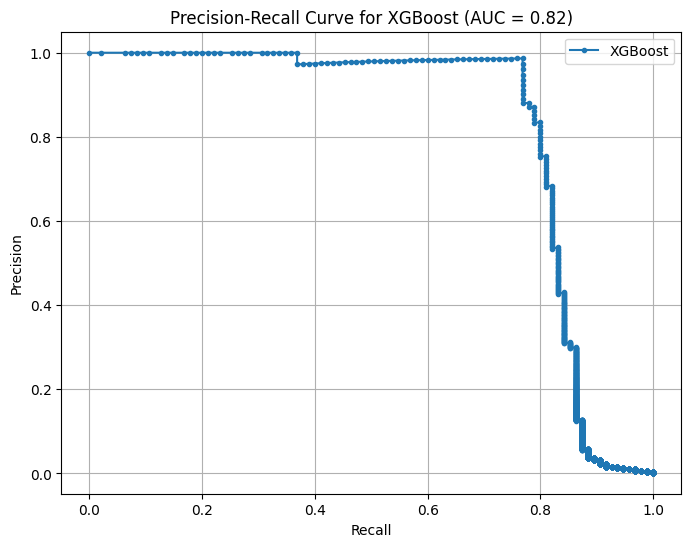

Confusion Matrix:
 [[56648     3]
 [   22    73]]
Accuracy: 0.9995594403129736
Precision: 0.9800690516656915
Recall: 0.8841840484071912
F1-Score: 0.9267902786737732
AUC-PR: 0.823415809344725
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.77      0.85        95

    accuracy                           1.00     56746
   macro avg       0.98      0.88      0.93     56746
weighted avg       1.00      1.00      1.00     56746

Training Accuracy: 1.0
Validation Accuracy: 0.9995594403129736
The model might be overfitting.

Evaluating LightGBM...
[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 226980, number 

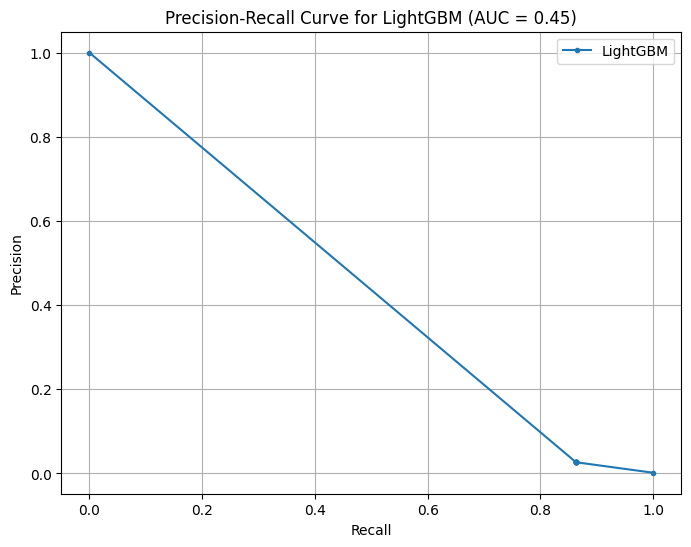

Confusion Matrix:
 [[53659  2992]
 [   13    82]]
Accuracy: 0.9470447256194269
Precision: 0.5132165648102022
Recall: 0.9051716465264236
F1-Score: 0.5122565702802621
AUC-PR: 0.44502524553243517
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     56651
           1       0.03      0.86      0.05        95

    accuracy                           0.95     56746
   macro avg       0.51      0.91      0.51     56746
weighted avg       1.00      0.95      0.97     56746

Training Accuracy: 0.9465988192792316
Validation Accuracy: 0.9470447256194269
The model might be underfitting.

Evaluating Random Forest...


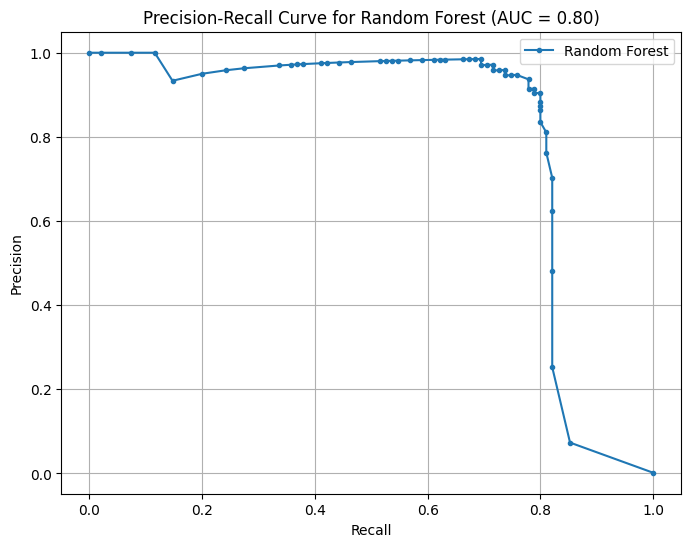

Confusion Matrix:
 [[56649     2]
 [   28    67]]
Accuracy: 0.9994713283755683
Precision: 0.9852602325969715
Recall: 0.8526139270083029
F1-Score: 0.9084042261960104
AUC-PR: 0.8044162018938413
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.71      0.82        95

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746

Training Accuracy: 0.9999955943254912
Validation Accuracy: 0.9994713283755683
The model might be overfitting.

Model dengan performa terbaik: XGBoost
F1-Score terbaik: 0.9268



In [ ]:
# Hitung weight untuk class imbalance
class_counts = y_train.value_counts()
scale_pos_weight = class_counts[0] / class_counts[1]  # Perbandingan antara kelas mayoritas dan minoritas

# Definisikan model dengan class_weight atau scale_pos_weight
models = {
    'XGBoost': XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42)
}

# Variabel untuk menyimpan hasil terbaik
best_model = None
best_model_name = None
best_f1_score = 0

# Evaluasi model
for name, model in models.items():
    print(f"\nEvaluating {name}...")

    # Fit model ke data training
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilitas kelas 1

    # Hitung metrik evaluasi
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Precision-Recall Curve
    precision_pr, recall_pr, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall_pr, precision_pr)

    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall_pr, precision_pr, marker='.', label=name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {name} (AUC = {pr_auc:.2f})')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Cetak hasil evaluasi
    print("Confusion Matrix:\n", cm)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC-PR:", pr_auc)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Cek overfitting atau underfitting
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"Training Accuracy: {train_score}")
    print(f"Validation Accuracy: {test_score}")

    if train_score > test_score:
        print("The model might be overfitting.")
    elif train_score < test_score:
        print("The model might be underfitting.")
    else:
        print("The model seems well-fitted.")

    # Simpan model terbaik berdasarkan F1-Score
    if f1 > best_f1_score:
        best_f1_score = f1
        best_model = model
        best_model_name = name

# Menampilkan model terbaik
print("\n====================")
print(f"Model dengan performa terbaik: {best_model_name}")
print(f"F1-Score terbaik: {best_f1_score:.4f}")
print("====================\n")
